Parámetros del modelo lineal:
Pendiente (m): -0.021034016066268504
Intersección (c): 1.5949974007561318


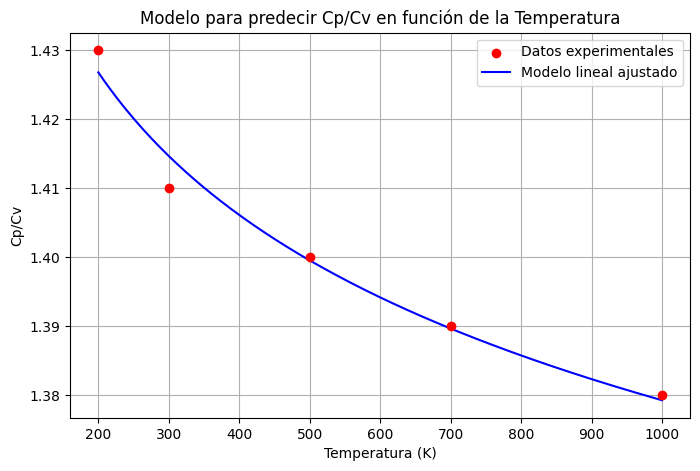

Predicción: Para T = 600 K, Cp/Cv = 1.394


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos extraídos de la gráfica:
# Temperatura (K) y la relación Cp/Cv para hidrógeno
T_data = np.array([200, 300, 500, 700, 1000])
gamma_data = np.array([1.43, 1.41, 1.40, 1.39, 1.38])

# Definición de un modelo lineal: gamma = m * T + c
def model_lineal(T, m, c):
    return T**m * c

# Ajuste usando la función curve_fit de scipy
popt, pcov = curve_fit(model_lineal, T_data, gamma_data)
m_ajustado, c_ajustado = popt
print("Parámetros del modelo lineal:")
print("Pendiente (m):", m_ajustado)
print("Intersección (c):", c_ajustado)

# Crear puntos para la predicción en un rango continuo de temperaturas
T_pred = np.linspace(200, 1000, 200)
gamma_pred = model_lineal(T_pred, m_ajustado, c_ajustado)

# Graficar los datos experimentales y el modelo ajustado
plt.figure(figsize=(8, 5))
plt.scatter(T_data, gamma_data, color='red', label='Datos experimentales', zorder=5)
plt.plot(T_pred, gamma_pred, color='blue', label='Modelo lineal ajustado')
plt.xlabel('Temperatura (K)')
plt.ylabel('Cp/Cv')
plt.title('Modelo para predecir Cp/Cv en función de la Temperatura')
plt.legend()
plt.grid(True)
plt.show()

# Función para predecir gamma dado un valor de temperatura
def predecir_gamma(T):
    return model_lineal(T, m_ajustado, c_ajustado)

# Ejemplo de uso: predecir gamma a 600 K
T_nueva = 600
gamma_nueva = predecir_gamma(T_nueva)
print(f"Predicción: Para T = {T_nueva} K, Cp/Cv = {gamma_nueva:.3f}")
